In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pylab  as plt 
from sklearn import datasets

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

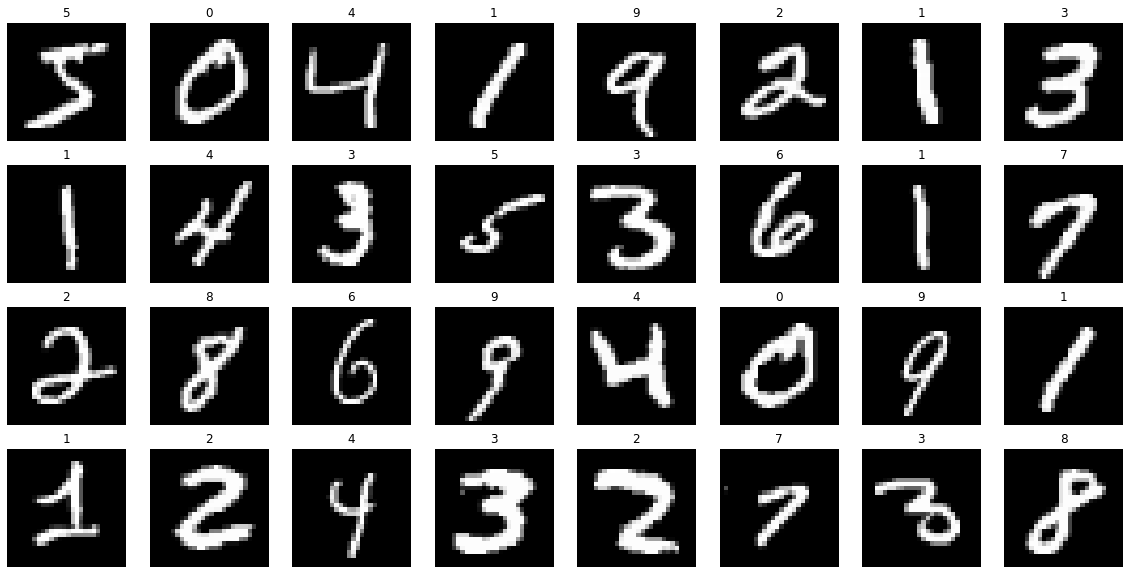

In [4]:
plt.figure(figsize=(20,10))
for i in range(32):
    label = y_train[i]
    plt.subplot(4, 8, 1+i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

Text(0.5, 1.0, '3')

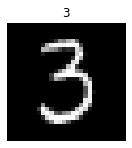

In [12]:
plt.figure(figsize=(20,10))
label = y_train[50]
plt.subplot(4, 8, 1+i)
plt.imshow(x_train[50], cmap='gray')
plt.axis('off')
plt.title(label)

### 이미지를 처리하는 다양한 커널들을 적용해보기 

- padding='VALID' 
    이미지의 엣지부분을 지키기 위해서 쉐잎을 살리고 싶다면 SAME 
    아니면 VALID 
    
- strides 
    

In [68]:
x = tf.constant( x_train[50] , dtype=tf.float64 )
x_img = tf.reshape(x, shape=[-1, 28, 28, 1])

In [69]:
# edge detection 
kernel1 = np.array([[-1,-1,-1],[1,-8,1],[-1,-1,-1]], dtype=np.float64).reshape([3,3,1,1])

# sharpen
kernel2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float64).reshape([3,3,1,1])

# blur 
kernel3 = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=np.float64).reshape([3,3,1,1]) / 9

In [74]:
@tf.function 
def convolution(x_img):
    return tf.nn.conv2d(x_img, kernel2, strides=[1,1,1,1], padding='VALID') 

output1 = convolution(x_img)

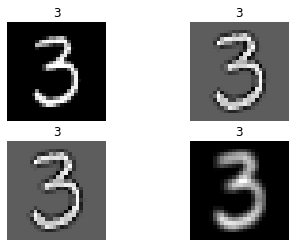

In [76]:
plt.subplot(2,2,1)
label = y_train[50]
plt.imshow(x_train[50], cmap='gray')
plt.axis('off')
plt.title(label)

plt.subplot(2,2,2)
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title(label)

plt.subplot(2,2,3)
plt.imshow(output1[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title(label)

plt.subplot(2,2,4)
plt.imshow(output2[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title(label)
plt.show()

In [80]:
@tf.function
def pooling(x_img):
    max_pool_2d =  tf.keras.layers.MaxPool2D((2,2))
    return max_pool_2d(x_img)

output = pooling(output)

Text(0.5, 1.0, '3')

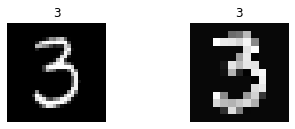

In [81]:
plt.subplot(2,2,1)
label = y_train[50]
plt.imshow(x_train[50], cmap='gray')
plt.axis('off')
plt.title('shape=({}, {})'.format(x.shape[50]))

plt.subplot(2,2,2)
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title(label)

# CNN은 자동으로 feature를 추출해준다. 